In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import tensorflow as tf


# Import and clean df

In [2]:
# Import cleaned VAERS dataset
vaers_df = pd.read_csv('../vaers_data_cleaned.csv', low_memory=False)
print(vaers_df.shape)
vaers_df.head()

(40247, 49)


,vaers_id,recvdate,state_,age_yrs,cage_yr,sex,symptom_text,died,datedied,l_threat,...,symptomversion4,symptom5,symptomversion5,vax_type,vax_manu,vax_lot,vax_dose_series,vax_route,vax_site,vax_name
0,1000000,02/04/2021,CA,NaN,NaN,M,tested positive; tested positive; This is a sp...,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
1,1000001,02/04/2021,WI,NaN,NaN,F,covid symptoms the 28th and tested positive; c...,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
2,1000003,02/04/2021,PA,29.0,NaN,F,rash and hives all over body; rash and hives a...,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,EJ1685,1,OT,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,1000006,02/04/2021,NaN,NaN,NaN,F,tested positive for covid; tested positive for...,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
4,1000007,02/04/2021,WI,53.0,NaN,M,blood sugar has been out of control ranging fr...,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,NaN,RA,COVID19 (COVID19 (PFIZER-BIONTECH))


In [3]:
# Drop duplicates in the dataframe
vaers_df.drop_duplicates(inplace=True)
print(vaers_df.shape)
vaers_df.head()

(40209, 49)


,vaers_id,recvdate,state_,age_yrs,cage_yr,sex,symptom_text,died,datedied,l_threat,...,symptomversion4,symptom5,symptomversion5,vax_type,vax_manu,vax_lot,vax_dose_series,vax_route,vax_site,vax_name
0,1000000,02/04/2021,CA,NaN,NaN,M,tested positive; tested positive; This is a sp...,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
1,1000001,02/04/2021,WI,NaN,NaN,F,covid symptoms the 28th and tested positive; c...,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
2,1000003,02/04/2021,PA,29.0,NaN,F,rash and hives all over body; rash and hives a...,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,EJ1685,1,OT,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,1000006,02/04/2021,NaN,NaN,NaN,F,tested positive for covid; tested positive for...,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
4,1000007,02/04/2021,WI,53.0,NaN,M,blood sugar has been out of control ranging fr...,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,NaN,RA,COVID19 (COVID19 (PFIZER-BIONTECH))


In [4]:
# Check vaers_df column types
vaers_df.dtypes

vaers_id             int64
recvdate            object
state_              object
age_yrs            float64
cage_yr            float64
sex                 object
symptom_text        object
died                object
datedied            object
l_threat            object
er_visit            object
hospital            object
hospdays           float64
x_stay              object
disable_            object
recovd              object
vax_date            object
onset_date          object
numdays            float64
lab_data            object
v_adminby           object
v_fundby            object
other_meds          object
cur_ill             object
history             object
splttype            object
form_vers            int64
todays_date         object
birth_defect        object
ofc_visit           object
er_ed_visit         object
allergies           object
symptom1            object
symptomversion1    float64
symptom2            object
symptomversion2    float64
symptom3            object
s

In [5]:
# Categorical variable list
vaers_cat = vaers_df.dtypes[vaers_df.dtypes == 'object'].index.tolist()
vaers_cat

['recvdate',
 'state_',
 'sex',
 'symptom_text',
 'died',
 'datedied',
 'l_threat',
 'er_visit',
 'hospital',
 'x_stay',
 'disable_',
 'recovd',
 'vax_date',
 'onset_date',
 'lab_data',
 'v_adminby',
 'v_fundby',
 'other_meds',
 'cur_ill',
 'history',
 'splttype',
 'todays_date',
 'birth_defect',
 'ofc_visit',
 'er_ed_visit',
 'allergies',
 'symptom1',
 'symptom2',
 'symptom3',
 'symptom4',
 'symptom5',
 'vax_type',
 'vax_manu',
 'vax_lot',
 'vax_dose_series',
 'vax_route',
 'vax_site',
 'vax_name']

In [6]:
# Unique values in each column
vaers_df[vaers_cat].nunique()

recvdate              70
state_                60
sex                    3
symptom_text       27184
died                   1
datedied              95
l_threat               1
er_visit               1
hospital               1
x_stay                 1
disable_               1
recovd                 3
vax_date             278
onset_date           206
lab_data            7721
v_adminby              9
v_fundby               4
other_meds         11809
cur_ill             3516
history             9512
splttype            5892
todays_date          104
birth_defect           1
ofc_visit              1
er_ed_visit            1
allergies           6239
symptom1            2301
symptom2            2220
symptom3            2017
symptom4            1833
symptom5            1617
vax_type              40
vax_manu              14
vax_lot             1886
vax_dose_series        8
vax_route              7
vax_site               9
vax_name              63
dtype: int64

In [7]:
# DIED value counts
counts = vaers_df.died.value_counts()
counts

Y    2569
Name: died, dtype: int64

In [8]:
# LAB DATA value counts
counts = vaers_df.lab_data.value_counts()
counts

None                                                                                                                                    2682
none                                                                                                                                    1557
no                                                                                                                                       222
NONE                                                                                                                                     192
None.                                                                                                                                    171
                                                                                                                                        ... 
EKG  and basic metabolic panel - normal.                                                                                                   1
None. I consu

In [9]:
# OTHER MEDS value counts
counts = vaers_df.other_meds.value_counts()
counts

None                                                                                                                                                                                                                      1866
none                                                                                                                                                                                                                       871
unknown                                                                                                                                                                                                                    359
Unknown                                                                                                                                                                                                                    359
No                                                                                                          

In [10]:
# CUR_ILL value counts
counts = vaers_df.cur_ill.value_counts()
counts

None                                                                                                                            6316
none                                                                                                                            3451
No                                                                                                                               654
no                                                                                                                               522
NONE                                                                                                                             365
                                                                                                                                ... 
Preliminary diagnosis of POTS                                                                                                      1
Anemia, cardiac murmur, atrial fibrillation, osteoporosis, dysphagia,

In [11]:
# HISTORY value counts
counts = vaers_df.history.value_counts()
counts

None                                                                                              3151
none                                                                                              1521
Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: None     675
Medical History/Concurrent Conditions: No adverse event (No reported medical history)              372
No                                                                                                 339
                                                                                                  ... 
HRB, depression                                                                                      1
Chronic sinus problems  and allergic rinithis                                                        1
Polycystic Ovary Syndrome  Type II Diabetes  Hypertension  PTSD                                      1
Psoriasis sleep apnea on cpap                                            

In [12]:
#SPLTTYPE value counts
counts = vaers_df.splttype.value_counts()
counts

USMODERNATX, INC.MOD20210    1286
vsafe                         514
VSAFE                          69
USMODERNATX, INC.MOD20200      47
USGLAXOSMITHKLINEUS2020GS      27
                             ... 
USPFIZER INC2021105932          1
USPFIZER INC2021081013          1
USPFIZER INC2020514614          1
USPFIZER INC2021120907          1
USPFIZER INC2021185570          1
Name: splttype, Length: 5892, dtype: int64

In [13]:
#ALLERGIES value counts
counts = vaers_df.allergies.value_counts()
counts

None             3365
none             1615
NKA               803
NKDA              767
No                401
                 ... 
Ceftin, Zomig       1
NKDA/ NKA           1
Raglan              1
Sal.eterol          1
yes-latex           1
Name: allergies, Length: 6239, dtype: int64

In [14]:
#SYMPTOM1 value counts
counts = vaers_df.symptom1.value_counts()
counts

Chills                          2357
Arthralgia                      1515
Headache                        1194
Injection site erythema         1176
Dizziness                       1175
                                ... 
Alveolar lung disease              1
Vaccine positive rechallenge       1
Muscle atrophy                     1
Myocardial strain                  1
Pericoronitis                      1
Name: symptom1, Length: 2301, dtype: int64

In [15]:
#SYMPTOM2 value counts
counts = vaers_df.symptom2.value_counts()
counts

Headache                           1682
Fatigue                            1301
Chills                             1118
Dizziness                           835
Pyrexia                             824
                                   ... 
Myocardial strain                     1
Hyperkalaemia                         1
Drug hypersensitivity                 1
Platelet function test abnormal       1
Sports injury                         1
Name: symptom2, Length: 2220, dtype: int64

In [16]:
#VAX_LOT value counts
counts = vaers_df.vax_lot.value_counts()
counts

039K20A       1375
011J20A       1256
EK9231        1132
EK5730        1072
EH9899        1047
              ... 
042220A          1
EH4899           1
025.120-2A       1
T022294          1
043220A          1
Name: vax_lot, Length: 1886, dtype: int64

In [17]:
# Drop LAB_DATA, OTHER MEDS, CUR_ILL, HISTORY, PRIOR_VAX, ALLERGIES - unless we use NLP, those columns can't be hot encoded
vaers_drop = vaers_df.drop(columns = ['lab_data', 'other_meds', 'cur_ill', 'history', 'allergies'])

In [18]:
# Drop Unamed: 0 because it is the same as the index and VAERS_ID
vaers_clean = vaers_drop.drop(columns = ['vaers_id'])

In [19]:
# Drop date columns to help the logistic regression model
vaers_dates = [col for col in vaers_clean.columns if 'date' in col]
vaers_log_clean =vaers_clean.drop(columns=vaers_dates)

In [20]:
vaers_dates

['recvdate', 'datedied', 'vax_date', 'onset_date', 'todays_date']

In [21]:
vaers_log_clean.columns

Index(['state_', 'age_yrs', 'cage_yr', 'sex', 'symptom_text', 'died',
       'l_threat', 'er_visit', 'hospital', 'hospdays', 'x_stay', 'disable_',
       'recovd', 'numdays', 'v_adminby', 'v_fundby', 'splttype', 'form_vers',
       'birth_defect', 'ofc_visit', 'er_ed_visit', 'symptom1',
       'symptomversion1', 'symptom2', 'symptomversion2', 'symptom3',
       'symptomversion3', 'symptom4', 'symptomversion4', 'symptom5',
       'symptomversion5', 'vax_type', 'vax_manu', 'vax_lot', 'vax_dose_series',
       'vax_route', 'vax_site', 'vax_name'],
      dtype='object')

In [22]:
# Drop symptoms columns
vaers_symptoms = [col for col in vaers_log_clean.columns if "symptom" in col]
vaers_log_clean = vaers_log_clean.drop(columns = vaers_symptoms)

In [23]:
# re-count Unique values in each column in new cleaned df
vaers_log_clean.nunique()

state_               60
age_yrs             118
cage_yr             105
sex                   3
died                  1
l_threat              1
er_visit              1
hospital              1
hospdays             33
x_stay                1
disable_              1
recovd                3
numdays             115
v_adminby             9
v_fundby              4
splttype           5892
form_vers             2
birth_defect          1
ofc_visit             1
er_ed_visit           1
vax_type             40
vax_manu             14
vax_lot            1886
vax_dose_series       8
vax_route             7
vax_site              9
vax_name             63
dtype: int64

In [24]:
# Drop Duplicates after Sypmtoms columns are out
vaers_log_clean.drop_duplicates(inplace=True)
print(vaers_log_clean.shape)
vaers_log_clean.head()

(27740, 27)


,state_,age_yrs,cage_yr,sex,died,l_threat,er_visit,hospital,hospdays,x_stay,...,birth_defect,ofc_visit,er_ed_visit,vax_type,vax_manu,vax_lot,vax_dose_series,vax_route,vax_site,vax_name
0,CA,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
1,WI,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
2,PA,29.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Y,NaN,COVID19,PFIZER\BIONTECH,EJ1685,1,OT,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
4,WI,53.0,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,NaN,RA,COVID19 (COVID19 (PFIZER-BIONTECH))


In [25]:
#Search for columns with DIED in name to find the target column (y)
died_cols = [col for col in vaers_log_clean.columns if 'died' in col]
died_cols

['died']

In [26]:
# preapre target column (y)
vaers_log_clean['died'].fillna(value='N', inplace=True)
vaers_log_clean.died

0        N
1        N
2        N
3        N
4        N
        ..
40242    N
40243    N
40244    N
40245    N
40246    N
Name: died, Length: 27740, dtype: object

# One Hot Encoder

In [27]:
# Recriate the vares_clean categorical list
vaers_cat = vaers_log_clean.dtypes[vaers_log_clean.dtypes == 'object'].index.tolist()
vaers_cat


['state_',
 'sex',
 'died',
 'l_threat',
 'er_visit',
 'hospital',
 'x_stay',
 'disable_',
 'recovd',
 'v_adminby',
 'v_fundby',
 'splttype',
 'birth_defect',
 'ofc_visit',
 'er_ed_visit',
 'vax_type',
 'vax_manu',
 'vax_lot',
 'vax_dose_series',
 'vax_route',
 'vax_site',
 'vax_name']

In [28]:
# OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

#Fit and transform the OneHotEncoder
vaers_enc_df = pd.DataFrame(enc.fit_transform(vaers_log_clean[vaers_cat]))

#Add the encoded variable names to the DF
vaers_enc_df.columns = enc.get_feature_names(vaers_cat)
vaers_enc_df.head()

,state__AK,state__AL,state__AR,state__AS,state__AZ,state__CA,state__CO,state__CT,state__Ca,state__DC,...,vax_name_TDAP (NO BRAND NAME),vax_name_TETANUS TOXOID (NO BRAND NAME),vax_name_TYPHOID LIVE ORAL TY21A (VIVOTIF),vax_name_VACCINE NOT SPECIFIED (NO BRAND NAME),vax_name_VACCINE NOT SPECIFIED (OTHER),vax_name_VARICELLA (VARIVAX),vax_name_YELLOW FEVER (YF-VAX),vax_name_ZOSTER (NO BRAND NAME),vax_name_ZOSTER (SHINGRIX),vax_name_ZOSTER LIVE (ZOSTAVAX)
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Merge with vaers_clean and drop original cat. list
vaers_df_clean = vaers_log_clean.merge(vaers_enc_df, left_index=True, right_index=True)
vaers_df_final = vaers_df_clean.drop(vaers_cat,1)

# Split and Scale Data

In [30]:
#Search for columns with DIED in name to find the target column (y)
died_cols = [col for col in vaers_df_final.columns if 'died' in col]
died_cols

['died_N', 'died_Y']

In [31]:
# Counting values in died_y
counts = vaers_df_final.died_Y.value_counts()
counts

0.0    18079
1.0     1134
Name: died_Y, dtype: int64

In [32]:
# Split data into features and targets
y = vaers_df_final['died_Y']
X = vaers_df_final.drop(columns = ['died_Y', 'died_N'])

In [33]:
# treat X Nan Values
X=X.fillna(value=0)
X

,age_yrs,cage_yr,hospdays,numdays,form_vers,state__AK,state__AL,state__AR,state__AS,state__AZ,...,vax_name_TDAP (NO BRAND NAME),vax_name_TETANUS TOXOID (NO BRAND NAME),vax_name_TYPHOID LIVE ORAL TY21A (VIVOTIF),vax_name_VACCINE NOT SPECIFIED (NO BRAND NAME),vax_name_VACCINE NOT SPECIFIED (OTHER),vax_name_VARICELLA (VARIVAX),vax_name_YELLOW FEVER (YF-VAX),vax_name_ZOSTER (NO BRAND NAME),vax_name_ZOSTER (SHINGRIX),vax_name_ZOSTER LIVE (ZOSTAVAX)
0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29.0,0.0,0.0,1.0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,7.0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27732,25.0,25.0,0.0,1.0,2,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27733,32.0,32.0,0.0,6.0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27734,25.0,25.0,0.0,4.0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27737,60.0,60.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Counting values on y
y.value_counts()

0.0    18079
1.0     1134
Name: died_Y, dtype: int64

In [35]:
# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
y_train

25314    1.0
3338     0.0
9246     0.0
12671    0.0
6923     1.0
        ... 
9719     0.0
6597     0.0
9162     0.0
24573    0.0
10263    0.0
Name: died_Y, Length: 14409, dtype: float64

In [36]:
# Check y_train
y_train.value_counts()

0.0    13564
1.0      845
Name: died_Y, dtype: int64

# Logistic Regression

In [37]:
#Create a Logistic Regression Model
classifier = LogisticRegression(solver='liblinear', max_iter=200, random_state=78)
classifier

LogisticRegression(max_iter=200, random_state=78, solver='liblinear')

In [38]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=78, solver='liblinear')

In [39]:
# Evaluate
y_pred = classifier.predict(X_test)
print(f' Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}')

 Logistic regression model accuracy: 0.954


In [40]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4467,   48],
       [ 172,  117]])

In [41]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.6971065307107795

In [42]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      4515
         1.0       0.71      0.40      0.52       289

    accuracy                           0.95      4804
   macro avg       0.84      0.70      0.75      4804
weighted avg       0.95      0.95      0.95      4804



In [43]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.96      0.99      0.40      0.98      0.63      0.42      4515
        1.0       0.71      0.40      0.99      0.52      0.63      0.38       289

avg / total       0.95      0.95      0.44      0.95      0.63      0.42      4804



# Resampling the training data

## Oversampling

In [44]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({1.0: 13564, 0.0: 13564})

In [45]:
# Logistic regression using random oversampled data
classover = LogisticRegression(solver='liblinear', max_iter=200, random_state=78)
classover.fit(X_resampled, y_resampled)
y_pred = classover.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3986,  529],
       [  42,  247]])

In [46]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.99      0.88      0.85      0.93      0.87      0.76      4515
        1.0       0.32      0.85      0.88      0.46      0.87      0.75       289

avg / total       0.95      0.88      0.86      0.90      0.87      0.76      4804



## SMOTEENN

In [47]:
# Count the resampled classes
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=78)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0.0: 8473, 1.0: 13489})

In [48]:
# Logistic regression using SMOTEENN data
smot = LogisticRegression(solver='liblinear', max_iter=200, random_state=78)
smot.fit(X_resampled, y_resampled)
y_pred = smot.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3810,  705],
       [  20,  269]])

In [49]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.99      0.84      0.93      0.91      0.89      0.78      4515
        1.0       0.28      0.93      0.84      0.43      0.89      0.79       289

avg / total       0.95      0.85      0.93      0.88      0.89      0.78      4804



# Neural Network

In [50]:
# Preprocess numerical data for NN
# Create a StandardScaler instance
scaler=StandardScaler()

#Fit the Scaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
X_train_scaled 

array([[-0.69800181, -0.33832109, -0.21929652, ..., -0.01178225,
        -0.04084611, -0.04490757],
       [-0.11820969,  0.16164346,  3.93839228, ..., -0.01178225,
        -0.04084611, -0.04490757],
       [ 1.62116666, -1.44538544, -0.21929652, ..., -0.01178225,
        -0.04084611, -0.04490757],
       ...,
       [ 0.91713338,  1.05443729, -0.21929652, ..., -0.01178225,
        -0.04084611, -0.04490757],
       [-0.4909332 , -1.44538544, -0.21929652, ..., -0.01178225,
        -0.04084611, -0.04490757],
       [-0.94648415, -0.55259161, -0.21929652, ..., -0.01178225,
        -0.04084611, -0.04490757]])

In [52]:
#NN Features
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 4000
hidden_nodes_layer2 = 1000
hidden_nodes_layer3 = 100

In [53]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

#NN Model
nn_model= tf.keras.models.Sequential()
#Layer 1
nn_model.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, activation='relu', input_dim=number_input_features,
                                  kernel_initializer='ones',
                                  kernel_regularizer=tf.keras.regularizers.L1(0.01),
                                  activity_regularizer=tf.keras.regularizers.L2(0.01),
                                  bias_regularizer=regularizers.L2(0.01)))
#Layer 2
nn_model.add(tf.keras.layers.Dense(units = hidden_nodes_layer2, activation='relu'))
#Layer 3
nn_model.add(tf.keras.layers.Dense(units = hidden_nodes_layer3, activation='relu'))
# Output Layer
nn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4000)              32112000  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4001      
Total params: 32,116,001
Trainable params: 32,116,001
Non-trainable params: 0
_________________________________________________________________


In [54]:
#Compile Sequential and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [55]:
# import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#Define the checkpoint path and filenames
os.makedirs('checkpoints/optmization/', exist_ok=True)
checkpoint_path = 'checkpoints/optmization/weights.{epoch:02d}.hdf5'
# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000
)

In [56]:
# Train
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=20, callbacks=[cp_callback], validation_data=(X_test_scaled, y_test))

Epoch 1/20
451/451 [==============================] - 106s 233ms/step - loss: 361712.5570 - accuracy: 0.9277 - val_loss: 223934.3438 - val_accuracy: 0.9380
Epoch 2/20
451/451 [==============================] - 106s 234ms/step - loss: 250540.9919 - accuracy: 0.9331 - val_loss: 154886.9062 - val_accuracy: 0.9382
Epoch 3/20
 98/451 [=====>........................] - ETA: 1:17 - loss: 184533.8895 - accuracy: 0.9414
Epoch 00003: saving model to checkpoints/optmization/weights.03.hdf5
451/451 [==============================] - 104s 232ms/step - loss: 178413.3511 - accuracy: 0.9320 - val_loss: 134018.0469 - val_accuracy: 0.9205
Epoch 4/20
451/451 [==============================] - 104s 230ms/step - loss: 162311.1974 - accuracy: 0.9205 - val_loss: 126111.5469 - val_accuracy: 0.9296
Epoch 5/20
196/451 [============>.................] - ETA: 54s - loss: 152393.7707 - accuracy: 0.9273
Epoch 00005: saving model to checkpoints/optmization/weights.05.hdf5
451/451 [==============================] - 1

In [57]:
#Evaluate
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

151/151 - 6s - loss: 8623.9121 - accuracy: 0.9398
Loss: 8623.912109375, Accuracy: 0.9398418068885803


In [58]:
print(nn_model.evaluate(X_test_scaled, y_test, verbose=2))

151/151 - 7s - loss: 8623.9121 - accuracy: 0.9398
[8623.912109375, 0.9398418068885803]


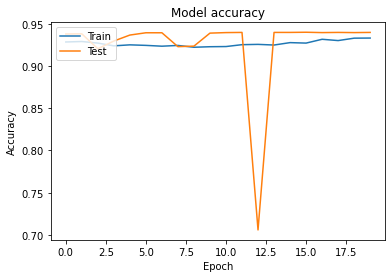

In [59]:
# Plot Accuracy (Train vs Test)
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

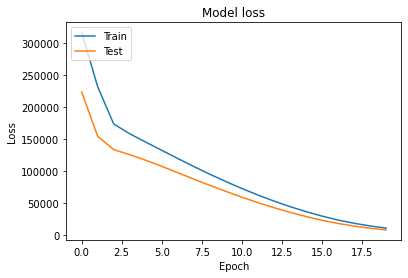

In [60]:
# Plot Loss (Train vs Test)
plt.plot(fit_model.history['loss']) 
plt.plot(fit_model.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()